<a href="https://colab.research.google.com/github/03-SudheshnaReddy/Smart-Mall-Assistant/blob/main/SmartMallAssistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ SmartMall Assistant — A Privacy-Aware Recommender System Using Clustering

### 🎯 Problem Overview

Retail businesses constantly strive to understand customer behavior to enhance shopping experiences and increase sales. But how can we do this *intelligently* — without asking customers for sensitive information like income or spending habits?

This project addresses that challenge by building a **privacy-friendly recommendation system** using unsupervised learning, behavioral analysis, and a chatbot interface.

---

## 📊 Step 1: Data Analysis & Feature Preparation

The dataset includes three key features:
- Age  
- Annual Income (in $1000s)  
- Spending Score (1–100)

We start by scaling this data to ensure fair contribution from each feature. Visualizing the relationships (e.g., Age vs Spending, Income vs Age) helps us understand how customer behavior varies across demographics.

These insights lay the groundwork for identifying customer segments.

---

## 🔍 Step 2: Clustering Using K-Means

We apply **K-Means Clustering** to uncover distinct groups of shoppers without using any labels.

The **Elbow Method** is used to determine the optimal number of clusters (k = 5). Each cluster reveals unique behavioral traits — like younger spenders, high-income cautious buyers, or senior value-seekers.

These clusters form the basis of our user personas.

---

## 🧠 Step 3: Designing Customer Personas

From clustering output, we derive 4 generalized shopping personas:

1. **Young Spender**
2. **Luxury Lover**
3. **Budget Shopper**
4. **Balanced Buyer**

Each persona maps to a particular cluster based on average behavior patterns like income and spending — **but without the user ever inputting these values**.

---

## 🤖 Step 4: Chatbot Assistant — User-Friendly, Privacy-Respecting

The chatbot asks just two questions:
- Your age  
- Your shopping persona (from 4 predefined types)

Main thing you cant cheat this chatbot if you enter your age as 50 and say you are young shopper it wont just give recommenadation based on your young shopper choice and second intresting thing is Instead of asking for income or spending score, the system internally maps the persona to a cluster and uses the **cluster's average behavior** for recommendations.

✅ This means:
- No sensitive data is collected
- Users receive tailored suggestions
- Privacy is preserved without sacrificing intelligence

---

## 📈 Step 5: Visual Analysis for Business Strategy

We generate graphs showing:
- Age vs. Spending Score  
- Income vs. Age  
- Income vs. Spending Score  

From this, we produce actionable insights like:

### Segment 2 (Luxury Lovers)
- Avg Age: 32.88  
- Avg Income: $86.1k  
- Spending Score: 81.53  
💎 Recommendation: Target with premium brands and exclusive offers.

### Segment 3 (Cautious Wealthy)
- Avg Age: 39.87  
- Avg Income: $86.1k  
- Spending Score: 19.36  
💼 Recommendation: Use smart promotions to trigger purchases.

This data helps mall managers understand who visits and how to guide them toward specific stores.

---

## 📄 Step 6: Generating a Business Report

All insights — cluster descriptions, graphs, strategic recommendations — are compiled into a **PDF report**.

This report can be shared with marketing teams or store managers to help make data-driven decisions that boost sales.

---

## 🔐 Ethical Highlight: Privacy First

Unlike traditional recommenders, this system:
- Does **not** ask for income or spending data
- Uses clustering to **infer behavior** based on safe, minimal inputs
- Demonstrates how **machine learning can be smart and ethical**

This balance of personalization and privacy is essential in today's world of responsible AI.

---

📍 In summary, this project blends behavioral clustering, real-time chatbot interaction, and visual storytelling to deliver a powerful, privacy-respecting recommendation system — tailored for modern retail environments.


In [1]:

print(" Smart Mall Persona Analysis Started!")


 Smart Mall Persona Analysis Started!


In [2]:
# Load all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fpdf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plotting styles
sns.set(style="whitegrid")
plt.style.use("ggplot")
print("All libraries loaded successfully!")

All libraries loaded successfully!


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check data shape
print(f" Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# General info
df.info()

# Check for missing values
print("\n Missing Values:\n")
print(df.isnull().sum())

# Describe numerical columns
df.describe()


 Rows: 200, Columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Missing Values:

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Clean up column names if needed
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/tmp/ipython-input-7-2248692372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


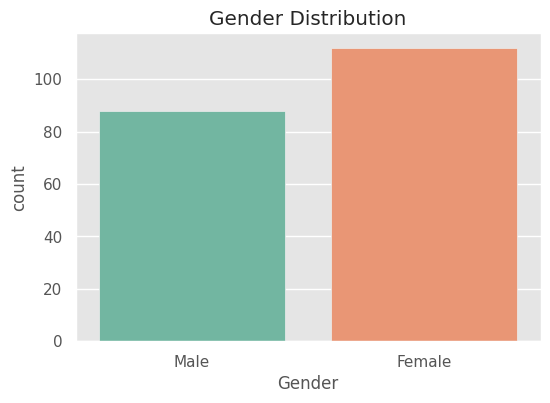

In [7]:
# Countplot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()


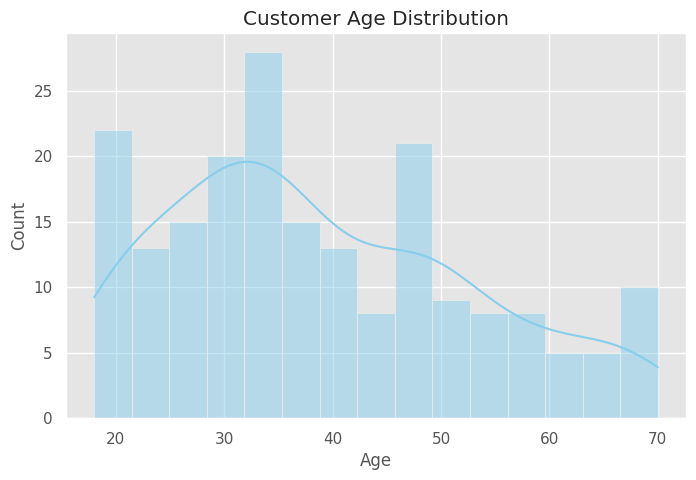

In [8]:
# Age Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


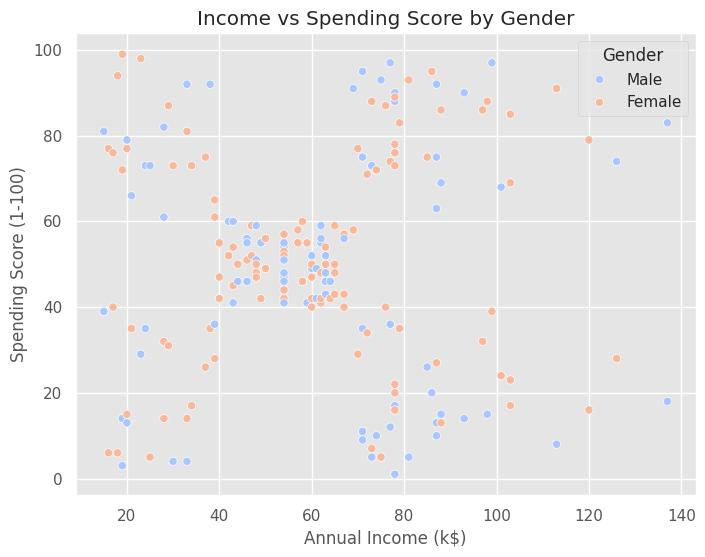

In [9]:
# Income vs Spending
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Income vs Spending Score by Gender')
plt.show()


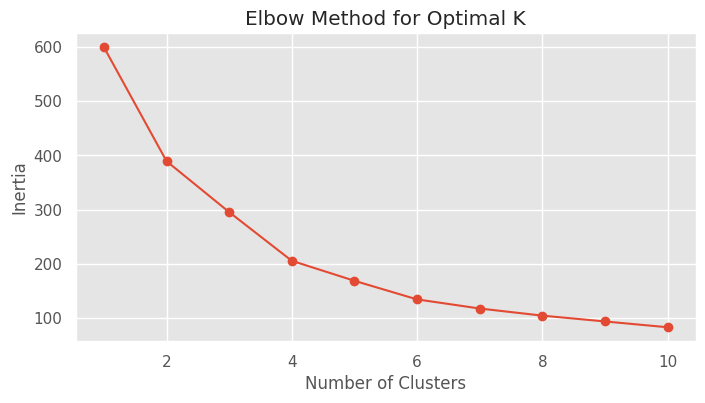

In [10]:
# Select features for clustering.Let's use: Age, Annual Income, Spending Score
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#  Elbow Method to choose optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


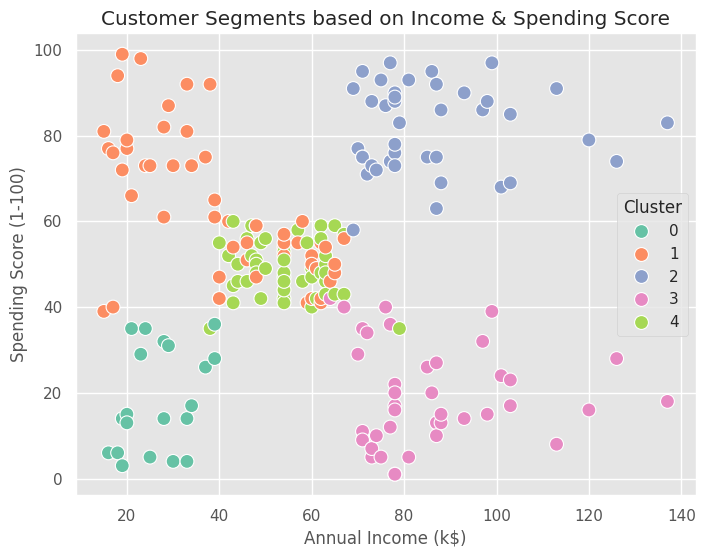

In [11]:
#  Apply KMeans
k = 5  # change this if elbow method gives another value
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#  Visualize Clusters (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Segments based on Income & Spending Score')
plt.show()

In [12]:
# Group by Cluster and calculate mean values
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,46.25,26.75,18.35,20
1,25.19,41.09,62.24,54
2,32.88,86.10,81.53,40
3,39.87,86.10,19.36,39
4,55.64,54.38,48.85,47


In [13]:
# Interpret cluster_summary manually
for i, row in cluster_summary.iterrows():
    print(f"\n🔹 Segment {i}:")
    print(f"- Avg Age: {row['Age']} years")
    print(f"- Income: ${row['Annual Income (k$)']}k")
    print(f"- Spending Score: {row['Spending Score (1-100)']}")

    # Smart Recommendation
    if row['Spending Score (1-100)'] > 70 and row['Annual Income (k$)'] > 70:
        print("💡 Strategy: High-Value Customers — Offer exclusive loyalty programs, premium lounges, and targeted upselling.")
    elif row['Spending Score (1-100)'] > 70:
        print("💡 Strategy: Young Spenders — Introduce trendy fashion outlets and fast shopping experiences.")
    elif row['Annual Income (k$)'] > 70:
        print("💡 Strategy: Rich but Cautious — Use targeted advertising to boost spending with bundles and luxury samples.")
    else:
        print("💡 Strategy: Low-Income — Focus on value-based retail, discounts, and necessity stores.")


🔹 Segment 0:
- Avg Age: 46.25 years
- Income: $26.75k
- Spending Score: 18.35
💡 Strategy: Low-Income — Focus on value-based retail, discounts, and necessity stores.

🔹 Segment 1:
- Avg Age: 25.19 years
- Income: $41.09k
- Spending Score: 62.24
💡 Strategy: Low-Income — Focus on value-based retail, discounts, and necessity stores.

🔹 Segment 2:
- Avg Age: 32.88 years
- Income: $86.1k
- Spending Score: 81.53
💡 Strategy: High-Value Customers — Offer exclusive loyalty programs, premium lounges, and targeted upselling.

🔹 Segment 3:
- Avg Age: 39.87 years
- Income: $86.1k
- Spending Score: 19.36
💡 Strategy: Rich but Cautious — Use targeted advertising to boost spending with bundles and luxury samples.

🔹 Segment 4:
- Avg Age: 55.64 years
- Income: $54.38k
- Spending Score: 48.85
💡 Strategy: Low-Income — Focus on value-based retail, discounts, and necessity stores.


/tmp/ipython-input-14-1690916391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set2')


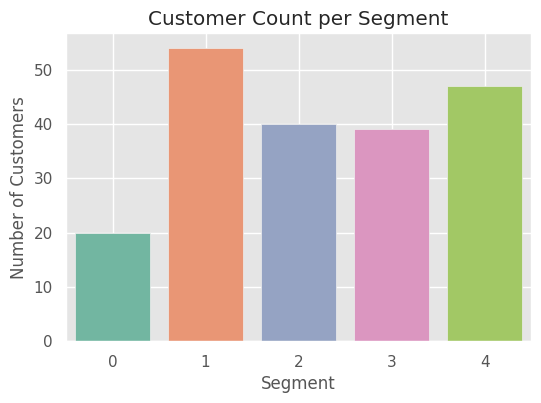

/tmp/ipython-input-14-1690916391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=col, palette='Pastel2')


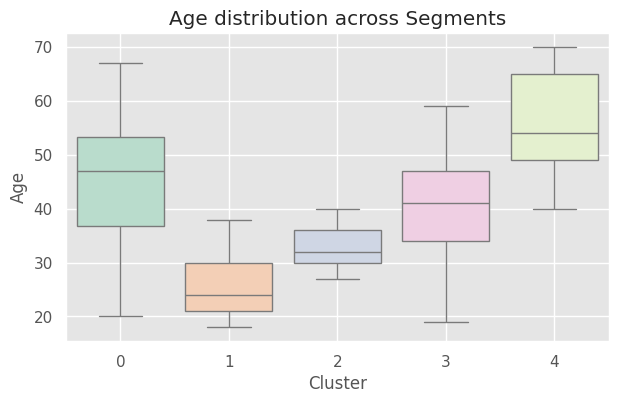

/tmp/ipython-input-14-1690916391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=col, palette='Pastel2')


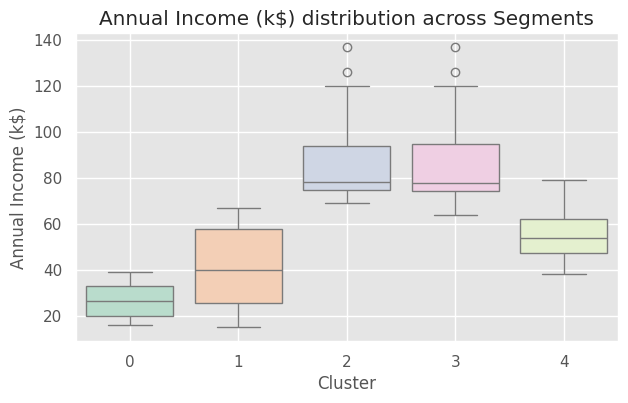

/tmp/ipython-input-14-1690916391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=col, palette='Pastel2')


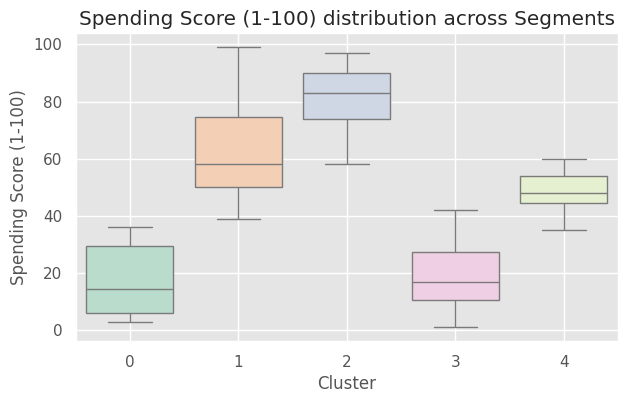

In [14]:
# Barplot: Number of customers per cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Cluster', palette='Set2')
plt.title('Customer Count per Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Boxplots for each feature across clusters
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='Cluster', y=col, palette='Pastel2')
    plt.title(f'{col} distribution across Segments')
    plt.grid(True)
    plt.show()


In [15]:
summary_text = ""
for i, row in cluster_summary.iterrows():
    summary_text += f"Segment {i}:\n"
    summary_text += f"- Average Age: {row['Age']} years\n"
    summary_text += f"- Average Income: ${row['Annual Income (k$)']}k\n"
    summary_text += f"- Spending Score: {row['Spending Score (1-100)']}\n"

    if row['Spending Score (1-100)'] > 70 and row['Annual Income (k$)'] > 70:
        summary_text += "Recommendation: 💎 High-value spenders. Provide premium service, exclusive offers.\n"
    elif row['Spending Score (1-100)'] > 70:
        summary_text += "Recommendation: 🛍️ Trendy shoppers. Focus on lifestyle brands and quick checkout.\n"
    elif row['Annual Income (k$)'] > 70:
        summary_text += "Recommendation: 💼 Wealthy but cautious. Trigger spending with smart promotions.\n"
    else:
        summary_text += "Recommendation: 🧺 Budget-friendly. Promote savings, discounts, essentials.\n"
    summary_text += "\n"

print(summary_text)


Segment 0:
- Average Age: 46.25 years
- Average Income: $26.75k
- Spending Score: 18.35
Recommendation: 🧺 Budget-friendly. Promote savings, discounts, essentials.

Segment 1:
- Average Age: 25.19 years
- Average Income: $41.09k
- Spending Score: 62.24
Recommendation: 🧺 Budget-friendly. Promote savings, discounts, essentials.

Segment 2:
- Average Age: 32.88 years
- Average Income: $86.1k
- Spending Score: 81.53
Recommendation: 💎 High-value spenders. Provide premium service, exclusive offers.

Segment 3:
- Average Age: 39.87 years
- Average Income: $86.1k
- Spending Score: 19.36
Recommendation: 💼 Wealthy but cautious. Trigger spending with smart promotions.

Segment 4:
- Average Age: 55.64 years
- Average Income: $54.38k
- Spending Score: 48.85
Recommendation: 🧺 Budget-friendly. Promote savings, discounts, essentials.




In [16]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Smart Mall Customer Segmentation Summary", ln=True, align='C')
pdf.ln(10)

# Add each segment summary
pdf.set_font("Arial", size=12)
for line in summary_text.strip().split('\n'):
    pdf.cell(200, 8, txt=line.encode('ascii', 'ignore').decode('ascii'), ln=True)

# Save PDF
pdf.output("smart_mall_summary.pdf")
print("📄 PDF 'smart_mall_summary.pdf' generated successfully!")
from google.colab import files
files.download("smart_mall_summary.pdf")


📄 PDF 'smart_mall_summary.pdf' generated successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
def smartmall_assistant():
    def get_recommendations(persona, age):
        if persona == "Young Spender":
            if age < 25:
                return ["Zara", "H&M", "Miniso", "KFC"]
            elif age < 40:
                return ["Uniqlo", "Nike", "Barista", "Bookstore"]
            else:
                return ["Elegant Casuals", "Formal Wear", "Lifestyle", "Quiet Lounge"]

        elif persona == "Luxury Lover":
            if age < 40:
                return ["Gucci", "Sephora", "Fine Dining", "Spa"]
            else:
                return ["Louis Vuitton", "Rolex", "Premium Spa", "Art Gallery"]

        elif persona == "Budget Shopper":
            if age < 40:
                return ["DMart", "Big Bazaar", "Kids Zone", "McDonald's"]
            else:
                return ["Daily Needs", "Value Pharmacy", "Discount Mart", "Café Coffee Day"]

        elif persona == "Balanced Buyer":
            if age < 40:
                return ["Lifestyle", "Home Centre", "Starbucks", "Book Store"]
            else:
                return ["FabIndia", "Reliance Trends", "Home Decor", "South Indian Restaurant"]

    def get_age_message(age):
        if age < 18:
            return "👶 You're a young explorer! Let’s find something exciting for you."
        elif age < 30:
            return "✨ You're a stylish Gen Z shopper! Trendy picks coming up."
        elif age < 45:
            return "🧔 You're a savvy millennial! We've got your vibe covered."
        elif age < 60:
            return "🎯 You're a practical professional shopper. Smart choices ahead."
        else:
            return "👵 You're a graceful classic shopper. Comfort and charm await you."

    personas = ["Young Spender", "Luxury Lover", "Budget Shopper", "Balanced Buyer"]

    print("🛍️ Welcome to SmartMall Assistant!")
    try:
        age = int(input("👤 Please enter your age: "))
        if age <= 0 or age > 120:
            print("❗ Please enter a realistic age (1–120).")
            return

        print("\n📍 Choose your shopping style/persona:")
        for i, p in enumerate(personas, 1):
            print(f"{i}. {p}")

        choice = int(input("Enter option number (1-4): "))
        if choice < 1 or choice > 4:
            print("❗ Invalid choice. Please select from 1 to 4.")
            return

        selected_persona = personas[choice - 1]
        recommendations = get_recommendations(selected_persona, age)
        age_message = get_age_message(age)

        print("\n🤖 SmartMall Assistant:")
        print(f"{age_message}")
        print(f"🎯 Based on your age ({age}) and chosen persona ({selected_persona}):")
        print("🏬 Recommended Stores to Visit Today:")
        for store in recommendations:
            print(f"   • {store}")
    except ValueError:
        print("❗ Please enter valid numeric inputs.")

smartmall_assistant()



🛍️ Welcome to SmartMall Assistant!
👤 Please enter your age: 50

📍 Choose your shopping style/persona:
1. Young Spender
2. Luxury Lover
3. Budget Shopper
4. Balanced Buyer
Enter option number (1-4): 1

🤖 SmartMall Assistant:
🎯 You're a practical professional shopper. Smart choices ahead.
🎯 Based on your age (50) and chosen persona (Young Spender):
🏬 Recommended Stores to Visit Today:
   • Elegant Casuals
   • Formal Wear
   • Lifestyle
   • Quiet Lounge
